In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as pyo
import plotly.graph_objs as go
import dash
from dash import dcc, html
import dash_html_components as html
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc, adjusted_rand_score
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn import svm
from scipy.stats import pearsonr, spearmanr
import warnings
import seaborn as sns
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [3]:
data = pd.read_excel("C:/Users/medal/OneDrive/Bureau/pilotage commercial.xlsx")

In [5]:
data.shape

(300, 23)

In [6]:
data.columns

Index(['Affectation par domaine D'activitée', 'Code', 'Date de création ',
       'Nom du client', 'Intitulé du projet', 'Type',
       'Affectation par secteur', 'Affectation géographique',
       'Résultat de l'opportunité ', 'Date de création de l'offre ',
       'Resposable ', 'Manager ', 'Consultant ',
       'Groupement / consultant seul ', 'Caution ',
       ' délai des remises des offres', 'Type de transmission',
       'Statut de l'offre ', 'Résultat de l'offre ', 'Commentaires ',
       'Affectation BU', 'Statut', 'Montant'],
      dtype='object')

In [7]:
data.head()

,Affectation par domaine D'activitée,Code,Date de création,Nom du client,Intitulé du projet,Type,Affectation par secteur,Affectation géographique,Résultat de l'opportunité,Date de création de l'offre,...,Groupement / consultant seul,Caution,délai des remises des offres,Type de transmission,Statut de l'offre,Résultat de l'offre,Commentaires,Affectation BU,Statut,Montant
0,BU.Conseil,01/2024,2024-01-16,WIFAK BANQUE,Mission d'assistance à la refonte du SI,Consultation,Banques,Tunisie,Offre,NaT,...,ACC,3000 TND,2024-02-16,Dépôt physique,Offre envoyée,En attente,-,AC,NaN,NaN
1,BU.Intégration,02/2024,2024-01-31,MEF/PAFEEM,Acquisition et implémentation d’un nouveau sys...,AOI,SFS,Mali,Offre,2024-02-29,...,ACC + SADIATOU,"6313,58 TND",2024-02-15,Dépôt physique,Offre envoyée,En attente,-,AC,NaN,NaN
2,BU.Conseil,03/2024,2024-01-24,STB,"choix des missions d’études, de pilotage et s...",Consultation,Banques,Tunisie,O.abandonnée,NaT,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,AC,NaN,NaN
3,BU.Conseil,04/2024,2024-01-25,CDC MAURITANIE,« Etude d’appui au développement d’un projet d...,AOI,Autre,Mauritanie,Offre,NaT,...,ACC + GB2A,NaN,2024-01-31,NaN,Offre envoyée,Gagnée,dossier adinistratif a été envoyé à notre part...,AC,NaN,NaN
4,BU.Conseil,05/2024,2024-01-01,MEF/PAFEEM,Etude diagnostic des SFD pour les aider à amél...,DP,SFS,Mali,Offre,2024-01-02,...,ACC+ SADIATOU,NaN,2024-01-30,Dépôt physique,Offre envoyée,En attente,NaN,AC,NaN,NaN


In [8]:
data.tail() #afficher les dernieres_lignes

,Affectation par domaine D'activitée,Code,Date de création,Nom du client,Intitulé du projet,Type,Affectation par secteur,Affectation géographique,Résultat de l'opportunité,Date de création de l'offre,...,Groupement / consultant seul,Caution,délai des remises des offres,Type de transmission,Statut de l'offre,Résultat de l'offre,Commentaires,Affectation BU,Statut,Montant
295,Conseil,C-00049,2022-06-24,Ministère de l’Economie et des Finances (MEF),"PROJET DE PROMOTION DE L’ACCÈS AU FINANCEMENT,...",NaN,Autre,Mali,offre,2022-06-24,...,AC+ TNP +QUALISYS,NaN,NaT,NaN,Envoyée,stand by,PAS DE DOSSIER,AC,Envoyée,NaN
296,Conseil,C-00047,2022-06-22,SATURNE,Politique Commerciale,Consultation,Autre,Tunisie,offre,2022-06-22,...,NaN,NaN,NaT,NaN,Envoyée,Abandonnée,PAS DE DOSSIER,AC,Envoyée,NaN
297,Conseil,C-00048,2022-06-22,SATURNE,PMO,Consultation,Autre,Tunisie,offre,2022-06-22,...,NaN,NaN,NaT,NaN,Envoyée,Abandonnée,PAS DE DOSSIER,AC,Envoyée,NaN
298,Digital,D-00003,NaT,ADVANS,Mise en place d’une solution de digitalisation...,Consultation,SFS,Tunisie,offre,NaT,...,NaN,NaN,NaT,NaN,Piste,Abandonnée,PAS DE DOSSIER,Digitaly,Piste,NaN
299,Digital,D-00004,NaT,ADVANS,Mise en place de la solution de Recouvrement,Consultation,SFS,Tunisie,offre,NaT,...,NaN,NaN,NaT,NaN,Piste,Abandonnée,PAS DE DOSSIER,Digitaly,Piste,NaN


In [9]:
data.info

<bound method DataFrame.info of     Affectation par domaine D'activitée      Code Date de création   \
0                            BU.Conseil  01/2024         2024-01-16   
1                        BU.Intégration  02/2024         2024-01-31   
2                            BU.Conseil  03/2024         2024-01-24   
3                            BU.Conseil  04/2024         2024-01-25   
4                            BU.Conseil  05/2024         2024-01-01   
..                                  ...       ...               ...   
295                             Conseil   C-00049        2022-06-24   
296                            Conseil    C-00047        2022-06-22   
297                            Conseil    C-00048        2022-06-22   
298                             Digital   D-00003               NaT   
299                             Digital   D-00004               NaT   

                                     Nom du client  \
0                                     WIFAK BANQUE   
1      

In [10]:
data.describe() #compte des éléments non nuls, la moyenne, l'écart type, les valeurs minimales et maximales, ainsi que les quartiles.


,Montant
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [11]:
data.describe(include=['object'])

,Affectation par domaine D'activitée,Code,Nom du client,Intitulé du projet,Type,Affectation par secteur,Affectation géographique,Résultat de l'opportunité,Resposable,Manager,Consultant,Groupement / consultant seul,Caution,Type de transmission,Statut de l'offre,Résultat de l'offre,Commentaires,Affectation BU,Statut
count,300,291,300,300,284,294,282,300,297,84,104,79,19,29,295,290,157,225,273
unique,19,277,207,291,62,16,69,6,9,34,62,48,18,18,13,10,64,4,11
top,Intégration,I-00091,BTS BANK,"choix des missions d’études, de pilotage et s...",AO,Banque,Tunisie,offre,MMO,Malek rekik,Majdi Ben HASSEN,TNP,1000 TND,Dépôt physique,Envoyée,Abandonnée,En cours de décison,AC,Envoyée
freq,78,3,14,2,105,142,109,264,98,15,10,9,2,12,148,71,54,196,148


In [12]:

# Check for missing values
print("Missing values:\n", data.isnull().sum())

Missing values:
 Affectation par domaine D'activitée      0
Code                                     9
Date de création                         5
Nom du client                            0
Intitulé du projet                       0
Type                                    16
Affectation par secteur                  6
Affectation géographique                18
Résultat de l'opportunité                0
Date de création de l'offre             17
Resposable                               3
Manager                                216
Consultant                             196
Groupement / consultant seul           221
Caution                                281
 délai des remises des offres           18
Type de transmission                   271
Statut de l'offre                        5
Résultat de l'offre                     10
Commentaires                           143
Affectation BU                          75
Statut                                  27
Montant                              

In [13]:
print("Column names and data types:\n", data.dtypes)

Column names and data types:
 Affectation par domaine D'activitée            object
Code                                           object
Date de création                       datetime64[ns]
Nom du client                                  object
Intitulé du projet                             object
Type                                           object
Affectation par secteur                        object
Affectation géographique                       object
Résultat de l'opportunité                      object
Date de création de l'offre            datetime64[ns]
Resposable                                     object
Manager                                        object
Consultant                                     object
Groupement / consultant seul                   object
Caution                                        object
 délai des remises des offres          datetime64[ns]
Type de transmission                           object
Statut de l'offre                              objec

In [14]:
rows_with_null = data.isnull().sum(axis=1)

# Maintenant, 'rows_with_null' est une série indiquant le nombre de valeurs nulles dans chaque ligne
# Vous pouvez l'utiliser pour filtrer les lignes ayant des valeurs nulles
rows_with_null = rows_with_null[rows_with_null > 0]

# Affichez les indices des lignes ayant des valeurs nulles
print(rows_with_null.index)

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            290, 291, 292, 293, 294, 295, 296, 297, 298, 299],
           dtype='int64', length=300)


In [15]:
def generate_code(row):
    if pd.isnull(row['Affectation par domaine D\'activitée']):
        return np.nan
    else:
        first_letter = row['Affectation par domaine D\'activitée'][0]
        random_number = str(np.random.randint(1000, 10000))
        code = first_letter.upper() + '-' + random_number
        # Check if the generated code already exists in the DataFrame
        if code in data['Code'].values:
            # If it exists, append a unique identifier until it becomes unique
            unique_id = 1
            while code + '_' + str(unique_id) in data['Code'].values:
                unique_id += 1
            code += '_' + str(unique_id)
        return code

# Apply the generate_code function to the 'Code' column
data['Code'] = data.apply(generate_code, axis=1)

# Check for duplicates again
duplicate_codes = data['Code'].duplicated()
print(data[duplicate_codes])

    Affectation par domaine D'activitée    Code Date de création   \
259                        Intégration   I-8128        2023-04-14   
264                        Intégration   I-6564        2023-05-04   

                                         Nom du client  \
259       Caisse de dépôt et de consignation du BENIN    
264  BCRG (Banque Centrale de la République de Guin...   

                                    Intitulé du projet Type  \
259  Mise en œuvre d'un progiciel de gestion integr...  EOI   
264  Développement et mise en place de l’interface ...   AO   

    Affectation par secteur Affectation géographique  \
259                  Banque                    BENIN   
264                  Banque                  Guinée    

    Résultat de l'opportunité  Date de création de l'offre   ...  \
259                      offre                   2023-04-14  ...   
264                      offre                   2023-05-04  ...   

        Groupement / consultant seul  Caution   délai

In [16]:
print(data['Code'].isnull().sum())

0


In [17]:
print(data.iloc[29])

Affectation par domaine D'activitée                         Conseil 
Code                                                          C-8516
Date de création                                 2024-01-16 00:00:00
Nom du client                                               BforBank
Intitulé du projet                     Lot 3 : Homologation Transact
Type                                                              AO
Affectation par secteur                                       Banque
Affectation géographique                                     France 
Résultat de l'opportunité                                      Offre
Date de création de l'offre                      2024-01-16 00:00:00
Resposable                                                       MMO
Manager                                                          NaN
Consultant                                             Moez OUSLATI 
Groupement / consultant seul                                     NaN
Caution                           

In [18]:
print(data['Date de création '].isnull().sum())

5


In [19]:
data['Date de création '].fillna(pd.NaT, inplace=True)

In [20]:
print(data['Date de création '].isnull().sum())

5


In [21]:
rows_with_null_date = data[data['Date de création '].isnull()]

# Print the rows with null date
print(rows_with_null_date)

    Affectation par domaine D'activitée    Code Date de création   \
12                       BU.Intégration  B-8647               NaT   
166                             conseil  C-1752               NaT   
187                            Digitaly  D-9340               NaT   
298                             Digital  D-2466               NaT   
299                             Digital  D-7000               NaT   

                        Nom du client  \
12                              BIAT    
166  République Démocratique du Congo   
187                         BTS BANK    
298                            ADVANS   
299                            ADVANS   

                                    Intitulé du projet  \
12   L'acquisition et la mise en place d'une platef...   
166  Projet d'acquisition de Software Core-banking ...   
187  Mise en  place d'une solution informatique per...   
298  Mise en place d’une solution de digitalisation...   
299      Mise en place de la solution de Recouvr

In [22]:
print(data['Nom du client'].isnull().sum())

0


In [23]:
print(data['Intitulé du projet'].isnull().sum())

0


In [24]:
# Assuming 'data' is your DataFrame and 'Type' is the column containing the values
# Standardize values in the column to start with "AMI"
data['Type'] = data['Type'].str.replace(r'^(?=.*\bAMI\b).*$', 'AMI', regex=True)
data['Type'] = data['Type'].str.replace(r'^(?=.*\bAMI\b).*$', 'AMI', regex=True)

# Print the unique values to verify the transformation
print(data['Type'].unique())

['Consultation ' 'AOI' 'DP' 'AON' 'AMI' 'consultation ' 'AO'
 'Consultation 43/2023' 'DP N° 02/2023MEF -PAFEEM ' 'consultation 32/2023'
 nan 'AO 04/2023' 'ETI/016/RFP/2023' 'consultation N°25/2023'
 'DP No\xa0: 06/PADSF/2023/BCC/DP' 'AO0l 23/003-PA0SITRA/DG/PRMP/A00I '
 'AO 02/2023' 'AO 34/2023' 'AO 83448350' 'C0018 Consultation '
 'N° 4/UCA/DAI/2023' 'AO N°111' 'Consultation'
 "AVIS D’APPEL D'OFFRES N°10/2023" '\nAMI N°02CF/PAMIF/BCM/2022'
 'Consultation 06/2023 ' 'AO N 05-2023' 'CONSULTATION 05/2023'
 'Consultation n°14/2023' 'DDPNO FAST-TUN-23-0041' 'AOO 44/ABB/2023 '
 '04/ABB/2023' 'AO 27/ABB/2023' 'AO 07/2023' 'consultation' 'GàG'
 'AO 13/2023' 'Rallonge' 'l’AO-077/22. ' 'AMI001-2022-SDSI-BOAD' 'AO '
 'Consultation 01/2023' 'CONSULTATION' 'CONSULTATION ' 'offre'
 'N° 83423378  ' 'CONSULTATION n°08/22' 'AO   N°08-2022' 'AO N°02/2023'
 'consultation N° 001/22' 'Appel d’offres N°11/2022' 'AO  N°2022/12'
 'AO N 01/2023' 'EOI' 'consultation REF,CR'
 'AO                                 

In [25]:
# Assuming 'data' is your DataFrame and 'col_name' is the column containing the values
# Standardize values in the column to start with "Consultation"
data['Type'] = data['Type'].str.replace(r'(?i)\bconsultation\b.*', 'Consultation', regex=True)

# Print the unique values to verify the transformation
print(data['Type'].unique())


['Consultation' 'AOI' 'DP' 'AON' 'AMI' 'AO' 'DP N° 02/2023MEF -PAFEEM '
 nan 'AO 04/2023' 'ETI/016/RFP/2023' 'DP No\xa0: 06/PADSF/2023/BCC/DP'
 'AO0l 23/003-PA0SITRA/DG/PRMP/A00I ' 'AO 02/2023' 'AO 34/2023'
 'AO 83448350' 'C0018 Consultation' 'N° 4/UCA/DAI/2023' 'AO N°111'
 "AVIS D’APPEL D'OFFRES N°10/2023" '\nAMI N°02CF/PAMIF/BCM/2022'
 'AO N 05-2023' 'DDPNO FAST-TUN-23-0041' 'AOO 44/ABB/2023 ' '04/ABB/2023'
 'AO 27/ABB/2023' 'AO 07/2023' 'GàG' 'AO 13/2023' 'Rallonge'
 'l’AO-077/22. ' 'AMI001-2022-SDSI-BOAD' 'AO ' 'offre' 'N° 83423378  '
 'AO   N°08-2022' 'AO N°02/2023' 'Appel d’offres N°11/2022'
 'AO  N°2022/12' 'AO N 01/2023' 'EOI'
 'AO                                                                 N°09-2022']


In [26]:
# Assuming 'data' is your DataFrame and 'col_name' is the column containing the values
# Standardize values in the column to start with "Consultation"
data['Type'] = data['Type'].str.replace(r'(?i)^(?:C\d+\s+)?consultation\b.*', 'Consultation', regex=True)

# Print the unique values to verify the transformation
print(data['Type'].unique())

['Consultation' 'AOI' 'DP' 'AON' 'AMI' 'AO' 'DP N° 02/2023MEF -PAFEEM '
 nan 'AO 04/2023' 'ETI/016/RFP/2023' 'DP No\xa0: 06/PADSF/2023/BCC/DP'
 'AO0l 23/003-PA0SITRA/DG/PRMP/A00I ' 'AO 02/2023' 'AO 34/2023'
 'AO 83448350' 'N° 4/UCA/DAI/2023' 'AO N°111'
 "AVIS D’APPEL D'OFFRES N°10/2023" '\nAMI N°02CF/PAMIF/BCM/2022'
 'AO N 05-2023' 'DDPNO FAST-TUN-23-0041' 'AOO 44/ABB/2023 ' '04/ABB/2023'
 'AO 27/ABB/2023' 'AO 07/2023' 'GàG' 'AO 13/2023' 'Rallonge'
 'l’AO-077/22. ' 'AMI001-2022-SDSI-BOAD' 'AO ' 'offre' 'N° 83423378  '
 'AO   N°08-2022' 'AO N°02/2023' 'Appel d’offres N°11/2022'
 'AO  N°2022/12' 'AO N 01/2023' 'EOI'
 'AO                                                                 N°09-2022']


In [27]:
# Assuming 'data' is your DataFrame and 'col_name' is the column containing the values
# Standardize values in the column to start with "Consultation"
data['Type'] = data['Type'].str.replace(r'(?i)\bAO\b.*', 'Consultation', regex=True)

# Print the unique values to verify the transformation
print(data['Type'].unique())

['Consultation' 'AOI' 'DP' 'AON' 'AMI' 'DP N° 02/2023MEF -PAFEEM ' nan
 'ETI/016/RFP/2023' 'DP No\xa0: 06/PADSF/2023/BCC/DP'
 'AO0l 23/003-PA0SITRA/DG/PRMP/A00I ' 'N° 4/UCA/DAI/2023'
 "AVIS D’APPEL D'OFFRES N°10/2023" '\nAMI N°02CF/PAMIF/BCM/2022'
 'DDPNO FAST-TUN-23-0041' 'AOO 44/ABB/2023 ' '04/ABB/2023' 'GàG'
 'Rallonge' 'l’Consultation' 'AMI001-2022-SDSI-BOAD' 'offre'
 'N° 83423378  ' 'Appel d’offres N°11/2022' 'EOI']


In [28]:
# Assuming 'data' is your DataFrame and 'col_name' is the column containing the values
# Standardize values in the column to start with "Consultation"
data['Type'] = data['Type'].str.replace(r'(?i)^(?:l’|C\d+\s+)?consultation\b.*', 'Consultation', regex=True)

# Print the unique values to verify the transformation
print(data['Type'].unique())

['Consultation' 'AOI' 'DP' 'AON' 'AMI' 'DP N° 02/2023MEF -PAFEEM ' nan
 'ETI/016/RFP/2023' 'DP No\xa0: 06/PADSF/2023/BCC/DP'
 'AO0l 23/003-PA0SITRA/DG/PRMP/A00I ' 'N° 4/UCA/DAI/2023'
 "AVIS D’APPEL D'OFFRES N°10/2023" '\nAMI N°02CF/PAMIF/BCM/2022'
 'DDPNO FAST-TUN-23-0041' 'AOO 44/ABB/2023 ' '04/ABB/2023' 'GàG'
 'Rallonge' 'AMI001-2022-SDSI-BOAD' 'offre' 'N° 83423378  '
 'Appel d’offres N°11/2022' 'EOI']


In [29]:
data['Type'] = data['Type'].str.replace('AMI001-2022-SDSI-BOAD', 'AMI', regex=True)
data['Type'] = data['Type'].str.replace('\nAMI N°02CF/PAMIF/BCM/2022', 'AMI', regex=True)
data['Type'] = data['Type'].str.replace('ETI/016/RFP/2023', 'AOI', regex=True)
data['Type'] = data['Type'].str.replace('Appel d’offres N°11/2022', 'AON', regex=True)
data['Type'] = data['Type'].str.replace('DP No\xa0: 06/PADSF/2023/BCC/DP', 'DP', regex=True)
data['Type'] = data['Type'].str.replace('DP N° 02/2023MEF -PAFEEM ', 'DP', regex=True)
data['Type'] = data['Type'].str.replace('DDPNO FAST-TUN-23-0041', 'DP', regex=True)
data['Type'] = data['Type'].str.replace('AO0l 23/003-PA0SITRA/DG/PRMP/A00I', 'AOI', regex=True)
data['Type'] = data['Type'].str.replace('N° 4/UCA/DAI/2023', 'AON', regex=True)
data['Type'] = data['Type'].str.replace('N° 83423378  ', 'AON', regex=True)
data['Type'] = data['Type'].str.replace("AVIS D’APPEL D'OFFRES N°10/2023", 'AON', regex=True)
data['Type'] = data['Type'].str.replace("04/ABB/2023", 'AOO ', regex=True)
data['Type'] = data['Type'].str.replace('AOO 44/ABB/2023 ', 'AOO ', regex=True)
data['Type'] = data['Type'].str.replace('AOI ', 'AOI', regex=True)
# Print the unique values to verify the transformation
print(data['Type'].unique())

['Consultation' 'AOI' 'DP' 'AON' 'AMI' nan 'AOO ' 'GàG' 'Rallonge' 'offre'
 'EOI']


In [30]:
print(data['Affectation par secteur'].isnull().sum())
print(data['Affectation par secteur'].unique())

6
['Banques ' 'SFS ' 'Autre' nan 'Assurances ' 'Banque ' 'AUTRE ' 'Banque'
 'Autre ' 'SFS' 'AUTRE' 'Assurance' 'Assuarnce ' 'autre ' 'Assurances'
 'leasing' 'offre']


In [31]:
data['Affectation par secteur'] = data['Affectation par secteur'].str.replace(r'^(?=.*\bAssurances\b).*$', 'Assurances', regex=True)
data['Affectation par secteur'] = data['Affectation par secteur'].str.replace('SFS ', 'SFS', regex=True)


In [32]:
print(data['Affectation par secteur'].unique())

['Banques ' 'SFS' 'Autre' nan 'Assurances' 'Banque ' 'AUTRE ' 'Banque'
 'Autre ' 'AUTRE' 'Assurance' 'Assuarnce ' 'autre ' 'leasing' 'offre']


In [33]:
data['Affectation par secteur'] = data['Affectation par secteur'].replace(['Assurance','Assurances ','Assurancess'], 'Assurances', regex=True)

In [34]:
print(data['Affectation par secteur'].unique())

['Banques ' 'SFS' 'Autre' nan 'Assurancess' 'Banque ' 'AUTRE ' 'Banque'
 'Autre ' 'AUTRE' 'Assurances' 'Assuarnce ' 'autre ' 'leasing' 'offre']


In [35]:
# Replace null values in 'Affectation par secteur' with 'autre'
data.loc[data['Affectation par secteur'].isnull(), 'Affectation par secteur'] = 'Autre'
print(data['Affectation par secteur'].unique())

['Banques ' 'SFS' 'Autre' 'Assurancess' 'Banque ' 'AUTRE ' 'Banque'
 'Autre ' 'AUTRE' 'Assurances' 'Assuarnce ' 'autre ' 'leasing' 'offre']


In [36]:
data['Affectation par secteur'] = data['Affectation par secteur'].str.replace('AUTRE', 'Autre', regex=True)
# Replace values starting with 'autre' (case-insensitive) with 'Autre'
# Convert values in 'Affectation par secteur' column to lowercase and check if they start with 'autre'
mask = data['Affectation par secteur'].str.lower().str.startswith('autre')

# Replace values where the condition is True with 'Autre'
data.loc[mask, 'Affectation par secteur'] = 'Autre'
data['Affectation par secteur'] = data['Affectation par secteur'].str.replace('Banques ', 'Banque', regex=True)
data['Affectation par secteur'] = data['Affectation par secteur'].str.replace('Banque ', 'Banque', regex=True)
data['Affectation par secteur'] = data['Affectation par secteur'].str.replace('Banques ', 'Banque', regex=True)

data['Affectation par secteur']  = data['Affectation par secteur'] .replace(["Assurancess","Assurances"],  "Assuarnce ")
data['Affectation par secteur'] = data['Affectation par secteur'].str.replace('SFS ', 'SFS' , regex=True)


In [37]:
print(data['Affectation par secteur'].unique())

['Banque' 'SFS' 'Autre' 'Assuarnce ' 'leasing' 'offre']


In [38]:
data['Affectation géographique'].fillna(pd.NaT, inplace=True)

In [39]:
print(data['Affectation géographique'].unique())

['Tunisie ' 'Mali ' 'Mauritanie ' 'France ' 'Bénin ' 'Burkina'
 'République centrafricaine' NaT 'Ghana ' '\xa0Malvales' 'Sénégal'
 'Afrique du Sud' 'Tunise' 'Mauritanie' 'Tuns' 'Mali' 'France' 'Tunisie'
 "Coté d'ivoire " 'Paris' 'TOGO' 'Angola ' 'Comores' 'MADAGASIKARA '
 'Guinée' 'Maldives ' 'Maroc' ' Comoros ' 'Burkina ' 'Guiné' 'Cameroun '
 'MAROC' "Côte d'Ivoire" 'SENEGAL ' 'Burkina-Faso' 'GHANA ' 'Dubai'
 ' Guinée' 'Lybie' 'Cameroun' 'Mozambique' 'Sao Tome ' 'Maroc ' 'Sénegal'
 'BENIN' ' Iles Maurices' 'MAURITANIE' 'TOGO ' 'madagascar' 'Congo'
 'Burkina - Guinée' 'KENYA' 'NIGER ' 'MAURICES' 'CAMEROUN' 'Bélgique '
 'MAURITANIE ' 'MALI' 'Madagascar' 'Arabie\xa0saoudite' 'LYBIE' 'Somalie '
 'Bélgique' 'Madagascar ' 'Guinée ' 'Togo' 'france' 'SEYCHELLES' 'MAROC '
 'Sénégal ']


In [40]:
print(data['Affectation géographique'].isnull().sum())

18


In [41]:
# Filter rows where 'Affectation géographique' is null
rows_with_null = data[data['Affectation géographique'].isnull()]

# Print the rows with null values in 'Affectation géographique'
print(rows_with_null)


    Affectation par domaine D'activitée    Code Date de création   \
16                         BU.Digitaly   B-5636        2024-03-04   
80                         Intégration   I-9420        2023-07-28   
90                         Intégration   I-6129        2023-06-26   
108                             conseil  C-9497        2023-05-24   
109                        Intégration   I-1533        2022-01-20   
110                             conseil  C-7631        2023-05-24   
116                        Intégration   I-7684        2022-02-04   
142                             conseil  C-7942        2023-02-28   
154                        Intégration   I-7453        2022-04-08   
165                             conseil  C-3230        2023-06-01   
179                             Conseil  C-9917        2022-10-10   
184                             Conseil  C-1491        2022-10-14   
186                             Conseil  C-8310        2022-10-10   
201                        Intégra

In [42]:
# Replace variations of 'Sénégal' with 'Sénégal'
data['Affectation géographique'] = data['Affectation géographique'].replace(['Sénégal', 'SENEGAL', 'Sénegal','Sénégal ','SENEGAL '], 'Sénégal')
print(data['Affectation géographique'].unique())

['Tunisie ' 'Mali ' 'Mauritanie ' 'France ' 'Bénin ' 'Burkina'
 'République centrafricaine' NaT 'Ghana ' '\xa0Malvales' 'Sénégal'
 'Afrique du Sud' 'Tunise' 'Mauritanie' 'Tuns' 'Mali' 'France' 'Tunisie'
 "Coté d'ivoire " 'Paris' 'TOGO' 'Angola ' 'Comores' 'MADAGASIKARA '
 'Guinée' 'Maldives ' 'Maroc' ' Comoros ' 'Burkina ' 'Guiné' 'Cameroun '
 'MAROC' "Côte d'Ivoire" 'Burkina-Faso' 'GHANA ' 'Dubai' ' Guinée' 'Lybie'
 'Cameroun' 'Mozambique' 'Sao Tome ' 'Maroc ' 'BENIN' ' Iles Maurices'
 'MAURITANIE' 'TOGO ' 'madagascar' 'Congo' 'Burkina - Guinée' 'KENYA'
 'NIGER ' 'MAURICES' 'CAMEROUN' 'Bélgique ' 'MAURITANIE ' 'MALI'
 'Madagascar' 'Arabie\xa0saoudite' 'LYBIE' 'Somalie ' 'Bélgique'
 'Madagascar ' 'Guinée ' 'Togo' 'france' 'SEYCHELLES' 'MAROC ']


In [43]:
data['Affectation géographique'] = data['Affectation géographique'].replace(['Mauritanie', 'MAURITANIE'], 'Mauritanie')
data['Affectation géographique'] = data['Affectation géographique'].replace(['Tunise', 'Tunisie','Tuns','Tunisie '], 'Tunisie')
data['Affectation géographique'] = data['Affectation géographique'].replace(['france', 'Paris','France '], 'France')
data['Affectation géographique'] = data['Affectation géographique'].replace(['BENIN','Bénin '], 'Bénin')
data['Affectation géographique'] = data['Affectation géographique'].replace(['Burkina','Burkina-Faso','Burkina - Guinée','Burkina '], 'Burkina Faso')
data['Affectation géographique'] = data['Affectation géographique'].replace(['GHANA','Ghana ','GHANA '], 'Ghana')
data['Affectation géographique'] = data['Affectation géographique'].replace(['Malvales','\xa0Malvales','Maldives '], 'Maldives')
data['Affectation géographique'] = data['Affectation géographique'].replace(["Coté d'ivoire","Coté d'ivoire "], "Côte d'Ivoire")

data['Affectation géographique'] = data['Affectation géographique'].replace(["madagascar"], "Madagascar")
data['Affectation géographique'] = data['Affectation géographique'].replace(["Iles Maurices"], "Île Maurice")

data['Affectation géographique'] = data['Affectation géographique'].replace(["Lybie","LYBIE"], "Libye")
data['Affectation géographique'] = data['Affectation géographique'].replace(['Arabie\xa0saoudite'],'Togo')
data['Affectation géographique'] = data['Affectation géographique'].replace(['TOGO '], "Arabie saoudite")
data['Affectation géographique'] = data['Affectation géographique'].replace(['MADAGASIKARA','MADAGASIKARA ','Madagascar '], "Madagascar")
data['Affectation géographique'] = data['Affectation géographique'].replace(['Mauritanie ','MAURITANIE '], 'Mauritanie')
data['Affectation géographique'] = data['Affectation géographique'].replace(['Mali ','MALI'], 'Mali')
data['Affectation géographique'] = data['Affectation géographique'].replace([' Comoros '], 'Comores')
data['Affectation géographique'] = data['Affectation géographique'].replace(['Guiné',' Guinée'], 'Guinée' )
data['Affectation géographique'] = data['Affectation géographique'].replace(['MAURICES', ' Iles Maurices'], 'Iles Maurices'  )
data['Affectation géographique'] = data['Affectation géographique'].replace(['Maroc ','MAROC','MAROC '],  'Maroc'  )
data['Affectation géographique'] = data['Affectation géographique'].replace(['CAMEROUN','Cameroun ' ],  'Cameroun'  )
data['Affectation géographique'] = data['Affectation géographique'].replace(['TOGO' ],  'Togo'  )
data['Affectation géographique'] = data['Affectation géographique'].replace(['KENYA' ],  'Kenya'  )
data['Affectation géographique'] = data['Affectation géographique'].replace(['NIGER ' ],  'Niger'  )
data['Affectation géographique'] = data['Affectation géographique'].replace(['SEYCHELLES'],  'Seychelles'  )
data['Affectation géographique'] = data['Affectation géographique'].replace(['Bélgique '],   'Bélgique'  )
data['Affectation géographique'] = data['Affectation géographique'].replace(r'^\s*$', np.nan, regex=True)
data['Affectation géographique'] = data['Affectation géographique'].str.strip()

print(data['Affectation géographique'].unique())

['Tunisie' 'Mali' 'Mauritanie' 'France' 'Bénin' 'Burkina Faso'
 'République centrafricaine' NaT 'Ghana' 'Maldives' 'Sénégal'
 'Afrique du Sud' "Côte d'Ivoire" 'Togo' 'Angola' 'Comores' 'Madagascar'
 'Guinée' 'Maroc' 'Cameroun' 'Dubai' 'Libye' 'Mozambique' 'Sao Tome'
 'Iles Maurices' 'Arabie saoudite' 'Congo' 'Kenya' 'Niger' 'Bélgique'
 'Somalie' 'Seychelles']


In [44]:
nombre_lignes_par_pays = data['Affectation géographique'].value_counts()
print(nombre_lignes_par_pays)

Tunisie                      114
Maroc                         18
Côte d'Ivoire                 15
France                        15
Sénégal                       13
Cameroun                      12
Mauritanie                    12
Mali                          10
Libye                         10
Togo                           8
Guinée                         8
Burkina Faso                   7
Comores                        7
Madagascar                     4
Bénin                          4
Maldives                       3
Bélgique                       2
Kenya                          2
Iles Maurices                  2
Angola                         2
Niger                          2
Arabie saoudite                2
Ghana                          2
République centrafricaine      1
Dubai                          1
Somalie                        1
Congo                          1
Afrique du Sud                 1
Seychelles                     1
Sao Tome                       1
Mozambique

In [45]:

data["Résultat de l'opportunité "] = data["Résultat de l'opportunité "].replace(["Offre ","offfre","offre","offre "], "Offre")

print(data["Résultat de l'opportunité "].unique())

['Offre' 'O.abandonnée']


In [46]:
data["Date de création de l'offre "].fillna(pd.NaT, inplace=True)

In [47]:
# Replace null values in 'Resposable' with 'MMO'
data['Resposable '] = data['Resposable '].replace(['MTR ','MTR ','MTR  '], 'MTR')
data['Resposable '] = data['Resposable '].replace(['NHI ' ], 'NHI' )
data['Resposable '] = data['Resposable '].replace(['MGU '], 'MGU' )
data['Resposable '] = data['Resposable '].replace(['MMO '], 'MMO' )
data['Resposable '] = data['Resposable '].replace([np.nan], 'MMO')

print(data['Resposable '].unique())

['MTR' 'MMO' 'NHI' 'MGU']


In [48]:
data['Manager '] = data['Manager '].replace(['RBM','Rahma ben Mrad ','Rahma Ben Mrad ','Rahma Ben MRAD ','RAHMA BEN MRAD '], 'Rahma Ben Mrad')
data['Manager '] = data['Manager '].replace(['Majdi Ben Hassen ','Majdi ben hassen ' ,'Majdi ben Hassen  '], 'Majdi ben Hassen ')

data['Manager '] = data['Manager '].replace(['TareK Sellami'], 'Tarek Sellami')
data['Manager '] = data['Manager '].replace(['Malek Rekik ','MRE','Malek rekik','Malek rekik '], 'Malek Rekik')
data['Manager '] = data['Manager '].replace(['HAMZA OURI ','HAMZA OURI','Hamza Ouri '],  'Hamza Ouri')
data['Manager '].fillna(np.nan, inplace=True)
data['Manager '] = data['Manager '].replace(['-'], np.nan)
data['Manager '] = data['Manager '].str.strip()

print(data['Manager '].unique())

['Rahma Ben Mrad' nan 'Malek Rekik' 'Selma Tliche' 'ELYES BOULADHANINE'
 'Seifeddine Naffati' 'Maroua Boubaker' 'najd hili' 'Hamza Ouri'
 'Tarek Sellami' 'Majdi ben Hassen' 'Manel Ammar'
 'Majdi ben hassen  +  Tarek sellami' 'Lamia Ben Ayed'
 'MAHDI Z +ELYES BOULADHANIN+NAOUFEL' 'mohamed ali trabelsi'
 'mariem Ben Zouitine' 'Haythem Hamzaoui']


In [49]:
print(data['Consultant '].unique())

Consultant = data['Consultant '].value_counts()
print(Consultant)

['Molka Hali ' 'Abir Riahi ' nan 'Moez Wesleti ' 'Kamel Dallel '
 'Med Hedi Touili ' 'Abir Riahi / Molka Hali' 'Majdi Ben Hassen '
 'Equipe Salesforce + Molka ' 'Abir Riahi/ Molka Hali ' 'MRE '
 'Moez OUSLATI ' 'Kamel DALLEL' 'ABIR RIAHI ' 'Majdi BEN HASSEN'
 'RAJA ZARRAD ' 'Raja Zarrad' 'MAJDI BEN HASSEN' 'Molka Mathlouthi '
 'MAJDI BEN HASSEN ' 'IMEN CHEKKI' 'Rajaa ZARRAD' 'Majdi BEN HASSEN '
 'Majdi Ben Haasen ' 'Majdi ben Hassen ' 'Emna ben Bahi +Leila CHEIKH '
 'Emna Ben Bahri ' 'Majdi Ben Hassen' 'Manel Ammar ' 'Ines Mhiri '
 'MOLKA MATHLOUTHI ' 'Majdi ben Hassen' 'EBO' 'EBA' 'Sarra Ben  Ammar '
 'MOLKA MATHLOUTHI' 'Sarra ben Ammar ' 'Molka Mathlouthi'
 'Molka Mathlouthi + Majdi  Ben Hassen ' 'Majdi Ben HASSEN '
 'Marwa Bejaoui +  EMNA BEN BAHRI ' 'Kamel Dalel + Yosr lahbaeil'
 'Yosr lahbaeil + Fatma ' 'Siwar Nefzi' 'SARRA  BEN AMMAR+ Manel '
 'Yosr lahbaeil' 'Hajer Housseini' 'EMNA BAHRI ' 'Nour Nfoussi'
 'Kamel Dalel' 'Souhir' 'Hajer Housseini ' 'Mehdi bellakhal' 'EBB' 'IMH'
 '

In [50]:


# Apply strip() method to remove trailing whitespace from all values in all attributes
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [51]:
data['Consultant '] = data['Consultant ' ].replace([ 'MOLKA MATHLOUTHI'],  'Molka Mathlouthi')

data['Consultant '] = data['Consultant ' ].replace([ 'ABIR RIAHI'],  'Abir Riahi')
data['Consultant '] = data['Consultant ' ].replace([ 'Moez OUSLATI'],  'Moez Wesleti')
data['Consultant '] = data['Consultant ' ].replace(['Kamel DALLEL'],  'Kamel Dalel')
data['Consultant '] = data['Consultant ' ].replace(['Majdi BEN HASSEN','Majdi ben Hassen' ,'MAJDI BEN HASSEN','Majdi Ben Hasen','Majdi Ben HASSEN','Majdi Ben Haasen'],  'Majdi Ben Hassen')
data['Consultant '] = data['Consultant ' ].replace(['MRE'],  'Malek Rekik')

data['Consultant '] = data['Consultant ' ].replace([ 'RAJA ZARRAD','Rajaa ZARRAD'],  'Raja Zarrad' )
data['Consultant '] = data['Consultant ' ].replace([ 'EMNA BAHRI','EBA','EBB'],  'Emna Ben Bahri' )
data['Consultant '] = data['Consultant ' ].replace([ 'Sarra ben Ammar'],  'Sarra Ben  Ammar' )
data['Consultant '] = data['Consultant ' ].replace([ 'MBZ'],  'Mariem Ben Zouitine' )
data['Consultant '] = data['Consultant ' ].replace([ 'SNE'],  'Seifeddine NAFFAT' )
data['Consultant '] = data['Consultant ' ].replace([ 'MAM'],  'Manel Ammar' ) 
data['Consultant '] = data['Consultant ' ].replace([ 'IMH'],  'Ines Mhiri' )  
data['Consultant '] = data['Consultant ' ].replace([ 'IMH'],  'Elyes  Bouladhanine' )
data['Consultant '] = data['Consultant ' ].replace([  'Yosr lahbaeil + Fatma'], 'Yosr lahbaeil' )
data['Consultant '] = data['Consultant '].str.strip()
print(data['Consultant '].unique())

['Molka Hali' 'Abir Riahi' nan 'Moez Wesleti' 'Kamel Dallel'
 'Med Hedi Touili' 'Abir Riahi / Molka Hali' 'Majdi Ben Hassen'
 'Equipe Salesforce + Molka' 'Abir Riahi/ Molka Hali' 'Malek Rekik'
 'Kamel Dalel' 'Raja Zarrad' 'Molka Mathlouthi' 'IMEN CHEKKI'
 'Emna ben Bahi +Leila CHEIKH' 'Emna Ben Bahri' 'Manel Ammar' 'Ines Mhiri'
 'EBO' 'Sarra Ben  Ammar' 'Molka Mathlouthi + Majdi  Ben Hassen'
 'Marwa Bejaoui +  EMNA BEN BAHRI' 'Kamel Dalel + Yosr lahbaeil'
 'Yosr lahbaeil' 'Siwar Nefzi' 'SARRA  BEN AMMAR+ Manel' 'Hajer Housseini'
 'Nour Nfoussi' 'Souhir' 'Mehdi bellakhal' 'Mariem Ben Zouitine'
 'Seifeddine NAFFAT' 'Sarra  Rajhi' 'sarra rajhi +majdi ben hassen'
 'Souha Labbessi']


In [52]:

Consultant = data['Consultant '].value_counts()
print(Consultant)

Majdi Ben Hassen                        32
Molka Mathlouthi                        11
Abir Riahi                               7
Raja Zarrad                              4
Med Hedi Touili                          4
Emna Ben Bahri                           4
Hajer Housseini                          3
Manel Ammar                              3
Siwar Nefzi                              3
Sarra Ben  Ammar                         3
Yosr lahbaeil                            2
Ines Mhiri                               2
Kamel Dalel                              2
Molka Mathlouthi + Majdi  Ben Hassen     2
Moez Wesleti                             2
Equipe Salesforce + Molka                1
IMEN CHEKKI                              1
sarra rajhi +majdi ben hassen            1
Emna ben Bahi +Leila CHEIKH              1
Molka Hali                               1
Malek Rekik                              1
Souhir                                   1
EBO                                      1
Kamel Dalle

In [53]:
data['Consultant '].fillna(pd.NaT, inplace=True)

In [54]:
data['Consultant ']

0          Molka Hali
1          Abir Riahi
2                 NaT
3                 NaT
4          Abir Riahi
            ...      
295       Siwar Nefzi
296               NaT
297    Souha Labbessi
298               NaT
299               NaT
Name: Consultant , Length: 300, dtype: object

In [55]:
data['Groupement / consultant seul '] = data['Groupement / consultant seul '].replace(['AC (chef de fil )                    Temenos                               Discovery                            Best way'],  'AC' )
data['Groupement / consultant seul '] = data['Groupement / consultant seul '].replace([ 'ACC'],  'AC' )
data['Groupement / consultant seul '] = data['Groupement / consultant seul '].replace([ 'AC CHEF DE FIL+ Temenos'],  'ACC + Temenos' )
data['Groupement / consultant seul '] = data['Groupement / consultant seul '].replace([ 'TNP+ACCOMPANY','ACC + TNP'],  'TNP+AC' )
data['Groupement / consultant seul '] = data['Groupement / consultant seul '].replace([ 'ACC+ SADIATOU'],  'ACC + SADIATOU' )
data['Groupement / consultant seul '] = data['Groupement / consultant seul '].replace([ 'TEMENOS'],  'Temenos' )
data['Groupement / consultant seul '] = data['Groupement / consultant seul '].replace([ 'TNP chef de file'],  'TNP' )
data['Groupement / consultant seul '] = data['Groupement / consultant seul '].replace([ 'TNP chef de file'],  'TNP' )
data['Groupement / consultant seul '] = data['Groupement / consultant seul '].replace([ 'ITEAM'],  'Iteam' )
data['Groupement / consultant seul '] = data['Groupement / consultant seul '].replace([ 'MCBC CONSULTING'],  'MCBC' )
data['Groupement / consultant seul '] = data['Groupement / consultant seul '].replace([ 'GROUPEMENT WEVIOO' ],  'Wevioo' )

print(data['Groupement / consultant seul '].unique())

['AC' 'ACC + SADIATOU' nan 'ACC + GB2A' 'ACC + Easnets'
 'ACC + SOLACE CORPORATION' 'TNP+AC' 'ACC + Temenos' 'GB2A'
 'SADIATOU CONSEIL' 'Temenos' 'TNP' 'MCBC' 'Discovery'
 'Groupement Accompany Consulting-TEMENOS-DISCOVERY\nINFORMATIQUE-SADIATOU CONSEIL'
 'AC+ OUSSAID +TNP ( chef de file )'
 'SADIATOU CONSEILS SARL / AC CHEF DE FILE' 'DABYAN'
 'TEMENOS  + Professionnels for smart technology' 'BESTWAY IT'
 'Talens consulting' 'Eversheds Sutherland' 'ITECH Guinée' 'Iteam'
 'Groupement talent consulting' 'AC+QUALSYS +TNP'
 'Groupement Temenos - i tech solution - bestway IT'
 'GROUPEMENT AVEC  INGENOSYA' 'Wevioo' 'TEMENOS +GOLD CONSULTING+ BTI'
 'QUALISYS+TNP+AC' 'AC+ ACW' 'Temenos+ Tech solution + Natray'
 'AC+ TNP +QUALISYS']


In [56]:
Groupement = data['Groupement / consultant seul '].value_counts()
print(Groupement)

TNP                                                                                 14
AC                                                                                  12
Temenos                                                                              9
MCBC                                                                                 5
Iteam                                                                                3
GB2A                                                                                 3
TNP+AC                                                                               3
ACC + SADIATOU                                                                       2
DABYAN                                                                               2
ACC + Temenos                                                                        2
Wevioo                                                                               2
Groupement talent consulting               

In [57]:
data[' délai des remises des offres'].fillna(pd.NaT, inplace=True)

In [58]:
# Supprimer le symbole "TND" de la colonne 'Caution' et remplacer les virgules par des points
data['Caution '] = data['Caution '].str.replace('TND', '').str.replace(',', '.')
# Remplacer les valeurs non numériques par NaN
data['Caution'] = pd.to_numeric(data['Caution '], errors='coerce')

# Supprimer le symbole 'DT' de la colonne 'Caution' et remplacer les virgules par des points
data['Caution'] = data['Caution '].str.replace('DT', '').str.replace(',', '.')

# Supprimer les lignes contenant des valeurs non numériques
data = data[data['Caution '] != '-']
# Convertir les valeurs en float
data['Caution '] = pd.to_numeric(data['Caution '], errors='coerce')


In [59]:
print(data['Caution '].value_counts())


1000.000    2
1500.000    2
3000.000    2
0.000       1
6313.580    1
500.000     1
800.000     1
4000.000    1
2000.000    1
5000.000    1
1271.186    1
Name: Caution , dtype: int64


In [60]:

# Convertir la colonne 'Caution ' en type numérique (float)
data['Caution '] = data['Caution '].astype(float)
# Calculer la colonne 'Montant' comme 3% de la colonne 'Caution'

data['Montant'] = data['Caution ']/0.03

In [61]:
print(data['Montant'].value_counts())

50000.000000     2
33333.333333     2
100000.000000    2
0.000000         1
42372.866667     1
16666.666667     1
133333.333333    1
166666.666667    1
210452.666667    1
66666.666667     1
26666.666667     1
Name: Montant, dtype: int64


In [62]:
# Remplacer les valeurs nulles dans la colonne 'Caution' par des valeurs aléatoires entre 1000 et 10000
mask = data['Caution '].isnull()
data.loc[mask, 'Caution '] = np.random.randint(1000, 10001, size=mask.sum())

In [63]:
print(data['Caution '].value_counts())
print( data['Caution '].isnull())

7226.0    2
6243.0    2
1000.0    2
3684.0    2
3000.0    2
         ..
6589.0    1
2682.0    1
3108.0    1
7154.0    1
6858.0    1
Name: Caution , Length: 292, dtype: int64
0      False
1      False
2      False
3      False
4      False
       ...  
295    False
296    False
297    False
298    False
299    False
Name: Caution , Length: 299, dtype: bool


In [64]:
data['Montant'] = data['Caution ']/0.03

In [65]:
print(data['Montant'].value_counts())

100000.000000    2
33333.333333     2
208100.000000    2
122800.000000    2
240866.666667    2
                ..
223733.333333    1
231800.000000    1
201166.666667    1
64633.333333     1
293600.000000    1
Name: Montant, Length: 292, dtype: int64


In [66]:

# Conditionally set values based on 'Résultat de l'opportunité'
for index, row in data.iterrows():
    if row["Résultat de l'opportunité "] == 'O.abandonnée':
        data.at[index, 'Statut de l\'offre'] = 'Perdue '
        data.at[index, 'Résultat de l\'offre '] = 'Abandonnée'
    else:
        data.at[index, 'Statut de l\'offre'] = ''

In [67]:
#data.to_excel("C:/Users/medal/OneDrive/Bureau/test.xlsx", sheet_name="sheet1", index=False)


In [68]:


# Supprimer les espaces blancs à droite dans la colonne "Type de transmission"
data['Type de transmission'] = data['Type de transmission'].str.rstrip()


In [69]:
print(data['Type de transmission'].value_counts())


Dépôt physique                                                                                                                                                                                                                                                                               12
Dépôt sur palce par un partenaire loacle                                                                                                                                                                                                                                                      1
courrier éléctronique                                                                                                                                                                                                                                                                         1
Dépôt  Physique                                                                                                                         

In [70]:
print(data['Type de transmission'].unique())

['Dépôt physique' nan 'DHL' 'Dépôt  Physique'
 'PAR VOIE POSTALE ( 3 copies )                                                       L’adresse de remise de la Proposition est : \nUnité de Gestion du PAFEEM sise à Hamdallaye ACI 2000 Immeuble Atlantique Assurances -4ème étage Bamako Mali - Numéro de téléphone : (+223) 20 22 45 14'
 'Dépôt éléctronique' 'Physique' 'plateforme de la BERD' 'POSTALE'
 'Dépôt électroniqueTn_Quotation@giz.de                  L’objet du mail doit porter uniquement la mention « consultation 83448350» Attention de ne pas mettre d’espace entre les chiffres'
 'Dépôt électronique' 'transmission  par mail.'
 'Dépôt sur palce par un partenaire loacle' 'dépôt par DHL'
 'Dépôt électronique SOUMAYA.BOUABIDI@AlbarakaBank.com.tn'
 'Les offres devront être envoyées à\xa0offres@gim-uemoa.org\xa0ou déposées au GIM-UEMOA à l’adresse suivante :Monsieur le Directeur Général du GIM-UEMOA\nAlmadies, Immeuble Hermès non loin de Fana Hôtel, Zone 9 Lot G\nBoîte Postale : 8853 Dakar Y

In [71]:

# Remplacer les valeurs spécifiées dans la colonne 'Type de transmission'
data['Type de transmission'] = data['Type de transmission'].replace([
    'Physique',
    'Banque Centrale Populaire \nDirection Achats, Marchés et Budgets\nEspace Porte d’Anfa, Bab EL Mansour2,\nAvenue Moulay Rachid 3ème Etage\nCasablanca-Maroc',
    'Dépôt  Physique'
], 'Dépôt physique')

data['Type de transmission'] = data['Type de transmission'].replace([
    "Les offres devront être envoyées à\xa0offres@gim-uemoa.org\xa0ou déposées au GIM-UEMOA à l’adresse suivante :Monsieur le Directeur Général du GIM-UEMOA\nAlmadies, Immeuble Hermès non loin de Fana Hôtel, Zone 9 Lot G\nBoîte Postale : 8853 Dakar Yoff (Sénégal)",
    'Dépôt  Physique','Dépôt sur palce par un partenaire loacle','Algerian Bank of Sénégal (ABS BANK)\nRoute des Almadies Lot 6, Immeuble AREZKI, 3ème étage – Dakar - Sénégal\nA l’Attention de Mr Abdelhafid Haned\nabdelhafid.haned@absbank.sn'
], 'Dépôt physique')

data['Type de transmission'] = data['Type de transmission'].replace([
    'DHL',
    'dépôt par DHL',
    'POSTALE',
    "PAR VOIE POSTALE ( 3 copies )                                                       L’adresse de remise de la Proposition est : \nUnité de Gestion du PAFEEM sise à Hamdallaye ACI 2000 Immeuble Atlantique Assurances -4ème étage Bamako Mali - Numéro de téléphone : (+223) 20 22 45 14"
], 'Dépôt Postale')

data['Type de transmission'] = data['Type de transmission'].replace([
   ' plateforme de la BERD', 'Dépôt électronique','courrier éléctronique', 'Dépôt électronique SOUMAYA.BOUABIDI@AlbarakaBank.com.tn', 'Dépôt électronique SOUMAYA.BOUABIDI@AlbarakaBank.com.tn', 'transmission  par mail.','plateforme de la BERD', 'Dépôt électroniqueTn_Quotation@giz.de                  L’objet du mail doit porter uniquement la mention « consultation 83448350» Attention de ne pas mettre d’espace entre les chiffres'
], 'Dépôt éléctronique')

In [72]:
print(data['Type de transmission'].unique())

['Dépôt physique' nan 'Dépôt Postale' 'Dépôt éléctronique']


In [73]:
print(data['Type de transmission'].value_counts())

Dépôt physique        18
Dépôt éléctronique     7
Dépôt Postale          4
Name: Type de transmission, dtype: int64


In [74]:
# Remplacer les valeurs nulles par 'Dépôt physique' dans la colonne 'Type de transmission'
data['Type de transmission'].fillna('Dépôt physique', inplace=True)


In [75]:
print(data['Type de transmission'].unique())

['Dépôt physique' 'Dépôt Postale' 'Dépôt éléctronique']


In [76]:
 
print(data["Statut de l'offre "].unique())


['Offre envoyée' nan 'Offre en préparation' 'en cours' 'Envoyée' 'envoyée'
 'Piste' 'piste' 'Perdue' 'Gagnée' 'Présélectionné']


In [77]:

data["Statut de l'offre "] = data["Statut de l'offre "].replace([
   'Offre envoyée',
 'envoyée'
    
], 'Envoyée')


data["Statut de l'offre "] = data["Statut de l'offre "].replace([
  'piste'

],  'Piste')

data["Statut de l'offre "] = data["Statut de l'offre "].replace([
 'en cours' 

],  'Offre en préparation')

In [78]:
print(data["Statut de l'offre "].unique())
print(data["Statut de l'offre "].value_counts())

['Envoyée' nan 'Offre en préparation' 'Piste' 'Perdue' 'Gagnée'
 'Présélectionné']
Envoyée                 220
Piste                    60
Offre en préparation      8
Gagnée                    2
Perdue                    2
Présélectionné            2
Name: Statut de l'offre , dtype: int64


In [79]:
print(data["Caution"].unique())

['3000 ' '6313.58 ' nan '5000 ' '1271.186 ' '1000 ' '1500 ' '3000' '600 '
 '27 000.000 ' '3500 ' '500 ' '2000 ' '800 ' '0 ' '4000 ']


In [80]:
 data['Caution']=data['Montant'] *0.03 

In [81]:
print(data["Caution"].unique())

[3000.    6313.58  3441.    9766.    6786.    3109.    7920.    8795.
 3151.    5000.    1271.186 6330.    1848.    3307.    9961.    4507.
 1000.    2682.    1500.    3684.    8164.    3745.    9288.    7426.
 8517.    2562.    8172.    3108.    9164.    3303.    3841.    6627.
 7668.    9956.    2086.    2234.    3343.    2941.    5796.    6243.
 8700.    8858.    3154.    6636.    5791.    5043.    3267.    7971.
 7313.    5289.    6327.    1698.    1816.    8191.    9422.    8892.
 8012.    2393.    1182.    2209.    4173.    4098.    9014.    2300.
 9362.    7634.    1672.    6742.    5323.    2193.    7251.    5196.
 1417.    5909.    5524.    2357.    5780.    6290.    2967.    2322.
 4527.    6075.    1615.    9799.    3729.     500.    1588.    8441.
 4162.    1705.    5231.    5399.    9200.    7720.    4721.    9126.
 2000.    1239.    9210.    2243.    4226.    5547.    4538.    3311.
 3685.    3071.    2104.    2376.    3111.    7854.    5357.    5750.
 6954.    3134.    2

In [82]:

nb_valeurs_nulles = data['Caution'].isnull().sum()

# Afficher le nombre de valeurs nulles dans chaque colonne
print(nb_valeurs_nulles)

0


In [83]:
#data.to_excel("C:/Users/medal/OneDrive/Bureau/test.xlsx", sheet_name="sheet1", index=False)

In [84]:
data["Affectation par domaine D'activitée"] = data["Affectation par domaine D'activitée"].str.replace(r'\bBU\.', '')

In [85]:
print(data["Affectation par domaine D'activitée"].unique())

['Conseil' 'Intégration' 'Digitaly' 'Intégration CRM' 'conseil' 'DIGITAL'
 'Inégration' 'Digitale' 'Digital' 'INTEGRATION' 'intégration' 'CONSEIL']


In [86]:

data["Affectation par domaine D'activitée"] = data["Affectation par domaine D'activitée"].replace([
   'Digitaly',
 'DIGITAL','Digitale'
    
], 'Digital')


data["Affectation par domaine D'activitée"] = data["Affectation par domaine D'activitée"].replace([
   'Intégration CRM',
 'intégration', 'Inégration','INTEGRATION'
    
], 'Intégration')

data["Affectation par domaine D'activitée"] = data["Affectation par domaine D'activitée"].replace([
   'CONSEIL',
  'conseil'
    
], 'Conseil')

In [87]:
print(data["Affectation par domaine D'activitée"].unique())

['Conseil' 'Intégration' 'Digital']


In [88]:
print(data["Nom du client"].unique())

['WIFAK BANQUE' 'MEF/PAFEEM' 'STB' 'CDC MAURITANIE' 'BforBank' 'BTS BANK'
 'CDC Bénin' 'BIAT' 'MEDD/DGFCE' 'ARCEP'
 'MINISTERE DES FINANCES ET DU BUDGET' 'Britam Group' 'BFPME' 'MAE'
 'Golden Tintona Investment' 'FTUSA' 'Baobab' 'Assurance BIAT' 'BCEAO'
 "Banque de développement de l'Afrique orientale et australe"
 'CDD MAURITANIE' "Ministère de l'Economie et des Finances" 'BAOBAB'
 'ZITOUNA' 'FIRCA' 'Ecobank Transnational Incorporated'
 'Standard BankStandard Bank Of Angola temmenos'
 'Tunisia Investment Authority- TIA' 'Banque Centrale des Comores'
 'La poste Malgache' 'Banque Régionale des Marchés (Sénégal)' 'BTL' 'GIZ'
 'VISTA BANK' 'BIMBANK' 'Bank of Maldives' 'BCP Technologies'
 'République du mali ministère de l’économie et des finances'
 'Banque Postale des Comoros (BPC)' 'AL BARAKA' 'la poste Tunsienne' 'TNP'
 'Banque Postale du COMORES' 'BEAC' 'UNESCO'
 'Fonds Interprofessionnel pour la Recherche et le Conseil Agricoles (FIRCA)'
 "Groupement Interbancaire Monétique de l'Union

In [89]:
print(data["Nom du client"].value_counts())

BTS BANK                                                              14
BforBank                                                              10
BCP Technologies                                                       9
STB                                                                    8
BIAT                                                                   6
                                                                      ..
MICROFINANCE INSTITUTION (INSURANCE GROUP MAURITIUS) avec MCBC         1
Central Bank of Sao Tome                                               1
Banque des États de l'Afrique Centrale (BEAC) - Yaoundé - Cameroun     1
Banque Nationale de Développement Économique du Sénégal                1
DEKIMO                                                                 1
Name: Nom du client, Length: 195, dtype: int64


In [90]:
#ata.to_excel("C:/Users/medal/OneDrive/Bureau/test.xlsx", sheet_name="sheet1", index=False)

In [91]:
# Condition pour mettre à jour le statut
condition = data["Résultat de l'offre "] == 'Abandonnée'

# Mise à jour du statut
data.loc[condition, 'Statut'] = 'Piste'

In [92]:
print(data["Statut"].unique())

[nan 'Piste' 'en cours' 'Envoyée' 'envoyée' 'Perdue' 'Gagnée'
 'Présélectionné']


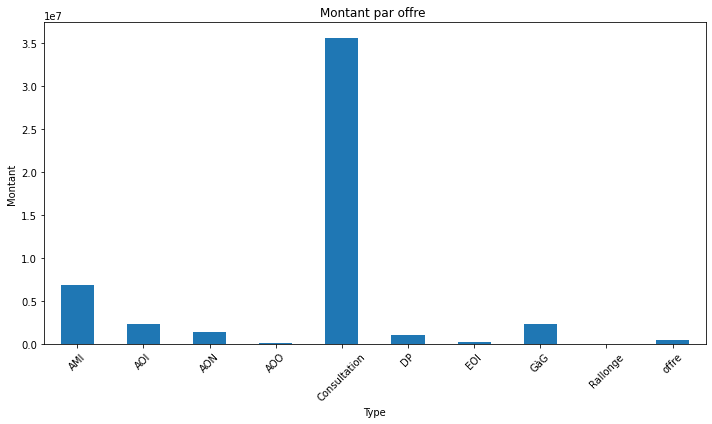

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

# Suppose df is your DataFrame containing the data
# Assuming the DataFrame is named 'df'

# Replace NaN values with 0 in the 'Montant' column
data['Montant'].fillna(0, inplace=True)

# Grouping the data by 'Nom du client' and calculating the sum of 'Montant' for each client
client_amount = data.groupby('Type')['Montant'].sum()

# Plotting the data
plt.figure(figsize=(10, 6))
client_amount.plot(kind='bar')
plt.title('Montant par offre ')
plt.xlabel('Type')
plt.ylabel('Budget')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout
plt.show()

In [6]:
df =pd.read_excel("C:/Users/medal/OneDrive/Bureau/test.xlsx")  # Replace "your_data.xlsx" with the path to your Excel file

# Afficher les noms de colonnes
titres = df.columns
print(titres)

Index(['Affectation par domaine D'activitée', 'Code', 'Date de création ',
       'Nom du client', 'Intitulé du projet', 'Type',
       'Affectation par secteur', 'Affectation géographique',
       'Résultat de l'opportunité ', 'Date de création de l'offre ',
       'Resposable ', 'Manager ', 'Consultant ',
       'Groupement / consultant seul ', 'Caution ',
       ' délai des remises des offres', 'Type de transmission',
       'Statut de l'offre ', 'Résultat de l'offre ', 'Commentaires ',
       'Affectation BU', 'Statut', 'Montant', 'Caution', 'Unnamed: 24',
       'Unnamed: 25'],
      dtype='object')


# DATA Augmentation

In [1]:
import pandas as pd
import requests
from nlpaug.augmenter.word import SynonymAug
import random
from datetime import datetime, timedelta

# Lire le fichier Excel existant dans un DataFrame
df = pd.read_excel("C:/Users/medal/OneDrive/Bureau/test.xlsx")

# Listes des options pour chaque colonne
domaine_activite = df["Affectation par domaine D'activitée"].unique()
types_projet = df['Type'].unique()
secteurs = df['Affectation par secteur'].unique()
geographies = df['Affectation géographique'].unique()
responsables = df['Resposable '].unique()
noms_consultants = df['Consultant '].unique()
types_transmission = df['Type de transmission'].unique()
statuts_offre = df["Statut de l'offre "].unique()
resultats_offre = df["Résultat de l'offre "].unique()
affectations_BU = df['Affectation BU'].unique()
clients = df['Nom du client'].unique()
managers = df['Manager '].unique()
consultants = df[ 'Consultant '].unique()
grouppemment = df[  'Groupement / consultant seul '].unique()

# Fonction pour générer une date aléatoire dans une plage donnée
def random_date(start_date, end_date):
    delta = end_date - start_date
    random_days = random.randint(0, delta.days)
    return start_date + timedelta(days=random_days)

# Fonction pour générer un code unique en fonction du domaine d'activité
def generer_code(domaine):
    if domaine == "Conseil":
        return "c-" + str(random.randint(1000, 9999))
    elif domaine == "Digital":
        return "d-" + str(random.randint(1000, 9999))
    elif domaine == "Integration":
        return "i-" + str(random.randint(1000, 9999))
    else:
        return "Code_invalide"

# Générer des titres de projet similaires à ceux existants dans les 300 lignes de données
aug = SynonymAug(aug_src='wordnet')
augmented_titles = []
for title in df['Intitulé du projet']:
    augmented_title = aug.augment(title)
    augmented_titles.append(augmented_title)

# Corriger les titres de projet avec LanguageTool
corrected_titles = []
for title in augmented_titles:
    response = requests.get("https://languagetool.org/api/v2/check", params={"text": title})
    corrected_title = title
    if response.status_code == 200:
        matches = response.json().get("matches")
        for match in matches:
            if match['offset'] == 0:
                corrected_title = match['replacements'][0]['value']
                break
    corrected_titles.append(corrected_title)

# Ajouter les titres corrigés au DataFrame
df['Intitulé du projet'] = corrected_titles

# Collecter les 300 titres de projet similaires existants
titres_existants = df['Intitulé du projet'].tolist()

# Initialiser l'augmentateur de synonymes
aug = SynonymAug(aug_src='wordnet')

# Générer les données pour les 10000 lignes
data = []
for _ in range(1000):
    domaine_activite_rand = random.choice(domaine_activite)
    date_creation = random_date(datetime(2023, 1, 1), datetime.now())
    # Assurer que la date de création de l'offre est antérieure à la date de création de l'offre
    date_offre = random_date(datetime(2012, 1, 1), date_creation - timedelta(days=1))
    manager_rand = random.choice(managers)
    consultant_rand = random.choice(consultants)
    
    titre_existants_aleatoires = random.choice(titres_existants)
    nouveau_titre = aug.augment(titre_existants_aleatoires)
    corrected_titles = []
    response = requests.get("https://languagetool.org/api/v2/check", params={"text": nouveau_titre})
    corrected_title = nouveau_titre
    if response.status_code == 200:
        matches = response.json().get("matches")
        for match in matches:
            if match['offset'] == 0:
                corrected_title = match['replacements'][0]['value']
                break

    row = {
        "Affectation par domaine D'activitée": domaine_activite_rand,
        "Code": generer_code(domaine_activite_rand),
        "Date de creation": date_creation,
        "Nom du client": random.choice(clients),
        "Type": random.choice(types_projet),
        "Affectation par secteur": random.choice(secteurs),
        'Affectation géographique': random.choice(geographies),
        "Manager ": manager_rand,
        'Intitulé du projet': corrected_title,
        'Consultant ': consultant_rand,
        "Resultat de l'opportunite": random.choice(resultats_offre),
        # Utiliser la date de création de l'offre générée précédemment
       "Date de création de l'offre ": date_offre,
        'délai des remises des offres': random_date(date_offre, datetime.now()),
        "Type de transmission": random.choice(types_transmission),
        "Statut de l'offre ": random.choice(statuts_offre),
        "Resultat de l'offre": random.choice(resultats_offre),
        "Affectation BU": random.choice(affectations_BU),
       'Groupement / consultant seul ': random.choice(grouppemment),
        'Coution':random.uniform(1000, 10000) ,
        'Montant':random.uniform(10000, 1000000) 
    }
    data.append(row)
# Convertir la liste 'data' en DataFrame
df_data = pd.DataFrame(data)

# Ajouter les 10000 lignes supplémentaires au DataFrame existant
df = pd.concat([df, df_data], ignore_index=True)

# Enregistrer les données dans un fichier Excel
df.to_excel("C:/Users/medal/OneDrive/Bureau/test.xlsx", index=False)


In [33]:
 nb_lignes = df.shape[0]
print("Nombre de lignes dans le DataFrame :", nb_lignes)


Nombre de lignes dans le DataFrame : 20299


In [ ]:
# Fonction pour générer un code unique en fonction du domaine d'activité
def generer_code(domaine):
    if domaine == "Conseil":
        return "c-" + str(random.randint(1000, 9999))
    elif domaine == "Digital":
        return "d-" + str(random.randint(1000, 9999))
    elif domaine == "Integration":
        return "i-" + str(random.randint(1000, 9999))
    else:
        return "I-" + str(random.randint(1000, 9999))


In [35]:

# Fonction pour générer un code unique en fonction du domaine d'activité
def generer_code(domaine):
    if domaine == "Conseil":
        return "c-" + str(random.randint(1000, 9999))
    elif domaine == "Digital":
        return "d-" + str(random.randint(1000, 9999))
    elif domaine == "Integration":
        return "i-" + str(random.randint(1000, 9999))
    else:
        return "I-" + str(random.randint(1000, 9999))
# Lire le fichier Excel existant dans un DataFrame
df = pd.read_excel("C:/Users/medal/OneDrive/Bureau/test.xlsx")

# Remplacer les valeurs "Code_invalide" dans la colonne "Code" par des codes générés
df['Code'] = df.apply(lambda row: generer_code(row["Affectation par domaine D'activitée"]) if row['Code'] == 'Code_invalide' else row['Code'], axis=1)


In [5]:
df.to_excel("C:/Users/medal/OneDrive/Bureau/test.xlsx", index=False)


# une classification non supervisée (clustering)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import LabelEncoder

# Charger les données
df = pd.read_excel("C:/Users/medal/OneDrive/Bureau/test.xlsx")

# Prétraitement des données
# Convertir les valeurs de chaîne en valeurs numériques avec LabelEncoder
le = LabelEncoder()
df['Résultat de l\'offre '] = le.fit_transform(df['Résultat de l\'offre '])

# Sélection des caractéristiques pertinentes pour le clustering
X = df[['Résultat de l\'offre ']].values

# Appliquer l'algorithme de clustering hiérarchique
Z = linkage(X, method='ward', metric='euclidean')

# Tracer le dendrogramme
plt.figure(figsize=(10, 8))
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.title('Dendrogramme')
plt.xlabel('Indice de l\'échantillon')
plt.ylabel('Distance euclidienne')

# Ajouter les titres de couleur selon l'échantillon
colors = ['r', 'g', 'b']  # Ajoutez autant de couleurs que de clusters
labels = df['Cluster']  # Assurez-vous que vous avez une colonne contenant les étiquettes de cluster
for i, label in enumerate(labels):
    plt.scatter(i, 0, color=colors[label], label=label)

plt.legend(loc='best')
plt.show()
